In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data
df = pd.read_csv('../rapm_possessions.csv')

In [3]:
def build_player_list(posessions):
    players = list(
        set(list(posessions['offensePlayer1Id'].unique()) + list(posessions['offensePlayer2Id'].unique()) + list(
            posessions['offensePlayer3Id']) + \
            list(posessions['offensePlayer4Id'].unique()) + list(posessions['offensePlayer5Id'].unique()) + list(
            posessions['defensePlayer1Id'].unique()) + \
            list(posessions['defensePlayer2Id'].unique()) + list(posessions['defensePlayer3Id'].unique()) + list(
            posessions['defensePlayer4Id'].unique()) + \
            list(posessions['defensePlayer5Id'].unique())))
    players.sort()
    return players

In [4]:
# lineups
df["all_offensive_players"] = (df["offensePlayer1Id"]).astype(str) + "," + (df["offensePlayer2Id"]).astype(str) + "," + (df["offensePlayer3Id"]).astype(str) + "," + (df["offensePlayer4Id"]).astype(str) + "," + (df["offensePlayer5Id"]).astype(str)
# sort all offensive players
df["all_offensive_players"] = df["all_offensive_players"].apply(lambda x: ",".join(sorted(x.split(","))))

df["all_defensive_players"] = (df["defensePlayer1Id"]).astype(str) + "," + (df["defensePlayer2Id"]).astype(str) + "," + (df["defensePlayer3Id"]).astype(str) + "," + (df["defensePlayer4Id"]).astype(str) + "," + (df["defensePlayer5Id"]).astype(str)
# sort all defensive players
df["all_defensive_players"] = df["all_defensive_players"].apply(lambda x: ",".join(sorted(x.split(","))))

In [6]:
# group by offensive and defensive lineups
df.columns

Index(['Unnamed: 0', 'offensePlayer1Id', 'offensePlayer2Id',
       'offensePlayer3Id', 'offensePlayer4Id', 'offensePlayer5Id',
       'defensePlayer1Id', 'defensePlayer2Id', 'defensePlayer3Id',
       'defensePlayer4Id', 'defensePlayer5Id', 'points', 'possessions',
       'all_offensive_players', 'all_defensive_players'],
      dtype='object')

In [64]:
summary_dct = {}
summary_dct["Total Players"] = len(build_player_list(df))
summary_dct["Total Possessions"] = df["possessions"].sum()
summary_dct["Total Offensive Lineups"] = len(df["all_offensive_players"].unique())
summary_dct["Total Defensive Lineups"] = len(df["all_defensive_players"].unique())
summary_dct["Total Lineups"] = len(df["all_offensive_players"].unique()) + len(df["all_defensive_players"].unique())
summary_df = pd.DataFrame()
summary_df["Header"] = summary_dct.keys()
summary_df["Value"] = summary_dct.values()
print(summary_df.to_latex(index=False, caption="Summarization of Data", label="tab:summarization"))

\begin{table}
\centering
\caption{Summarization of Data}
\label{tab:summarization}
\begin{tabular}{lr}
\toprule
                 Header &  Value \\
\midrule
          Total Players &    530 \\
      Total Possessions & 243312 \\
Total Offensive Lineups &  14926 \\
Total Defensive Lineups &  14926 \\
          Total Lineups &  29852 \\
\bottomrule
\end{tabular}
\end{table}



/var/folders/mv/qr8qb2nd0270g4ly5_1z9b0h0000gn/T/ipykernel_33527/4032685788.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary_df.to_latex(index=False, caption="Summarization of Data", label="tab:summarization"))


In [20]:
player_to_number_of_poss = {}

# find the number of times each player id occurs in the data
for player in build_player_list(df):
    player_to_number_of_poss[player] = df[(df["offensePlayer1Id"] == player) | (df["offensePlayer2Id"] == player) | (df["offensePlayer3Id"] == player) | (df["offensePlayer4Id"] == player) | (df["offensePlayer5Id"] == player) | (df["defensePlayer1Id"] == player) | (df["defensePlayer2Id"] == player) | (df["defensePlayer3Id"] == player) | (df["defensePlayer4Id"] == player) | (df["defensePlayer5Id"] == player)]["possessions"].sum() / 10

Text(0.5, 1.0, 'Number of Possessions Each Player Plays')

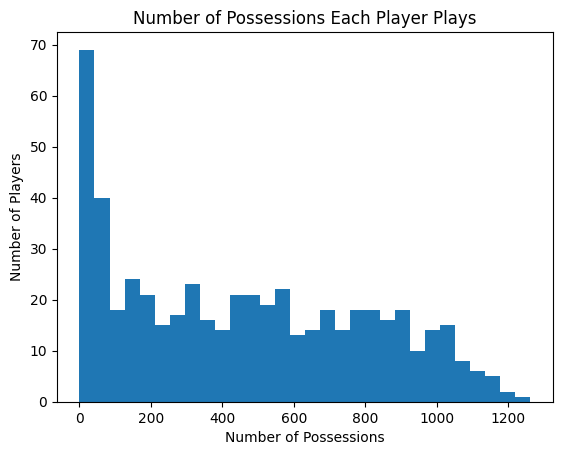

In [22]:
# plot a histogram of the number of possessions each player has
plt.hist(player_to_number_of_poss.values(), bins=30)
plt.xlabel("Number of Possessions")
plt.ylabel("Number of Players")
plt.title("Number of Possessions Each Player Plays")

In [19]:
import numpy as np
np.median(list(player_to_number_of_poss.values()))

4383.0